In [ ]:
!pip install pycaret[full]

     |████████████████████████████████| 266 kB 4.0 MB/s 
     |████████████████████████████████| 167 kB 41.8 MB/s 
     |████████████████████████████████| 111 kB 52.7 MB/s 
     |████████████████████████████████| 2.0 MB 30.9 MB/s 
     |████████████████████████████████| 261 kB 45.6 MB/s 
     |████████████████████████████████| 1.7 MB 23.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 38.2 MB/s 
     |████████████████████████████████| 14.6 MB 127 kB/s 
     |████████████████████████████████| 6.8 MB 39.2 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 271 kB 40.0 MB/s 
     |████████████████████████████████| 54.0 MB 40 kB/s 
     |████████████████████████████████| 308 kB 51.7 MB/s 
     |███████████████████

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
pip uninstall PyYAML

Found existing installation: PyYAML 6.0
Uninstalling PyYAML-6.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/PyYAML-6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/_yaml/*
    /usr/local/lib/python3.7/dist-packages/yaml/*
Proceed (y/n)? y
  Successfully uninstalled PyYAML-6.0


In [ ]:
pip install PyYAML==5.4.1

     |████████████████████████████████| 636 kB 2.7 MB/s 


In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel(r'/content/drive/My Drive/Colab Notebooks/Data.xlsx')
df.head()

Fine  Coarse  GGBS  OPC  SF  ...  Admixture  Fine MC  Coarse MC  Days    Strength
0   842     878   246  248  55  ...      12.63      3.3        0.2     7   75.300000
1   842     878   246  248  55  ...      12.63      3.3        0.2    28   97.166667
2   842     878   246  248  55  ...      12.63      3.3        0.2    56  108.666667
3   842     878   246  248  55  ...      12.63      3.3        0.2    91  117.133333
4   863     872   248  246  55  ...      12.64      4.2        1.0     7   75.200000

[5 rows x 11 columns]

In [ ]:
round(df.describe(),1)

Fine  Coarse   GGBS    OPC  ...  Fine MC  Coarse MC   Days  Strength
count  152.0   152.0  152.0  152.0  ...    152.0      152.0  152.0     152.0
mean   871.7   874.3  246.6  246.3  ...      4.4        0.5   45.5     105.2
std     11.7    10.2    1.4    0.9  ...      0.7        0.2   31.6      14.6
min    842.0   857.0  244.0  244.0  ...      3.2        0.2    7.0      70.3
25%    863.0   866.0  246.0  246.0  ...      4.0        0.3   22.8      94.5
50%    870.0   874.0  246.0  246.0  ...      4.2        0.5   42.0     107.9
75%    879.0   879.0  248.0  247.0  ...      5.0        0.6   64.8     115.7
max    900.0   904.0  250.0  248.0  ...      6.0        1.0   91.0     131.4

[8 rows x 11 columns]

In [ ]:
df.shape

(152, 9)

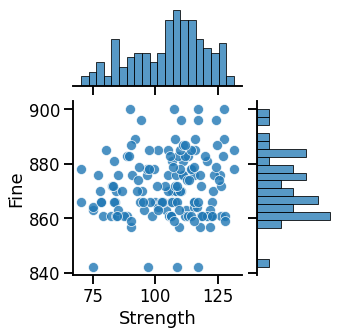

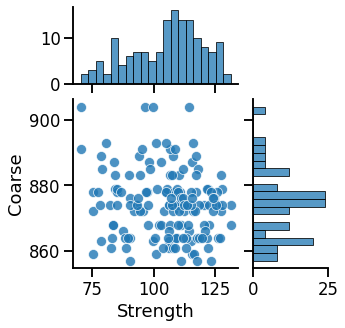

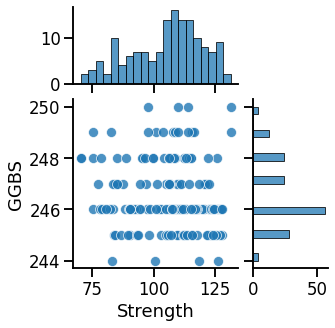

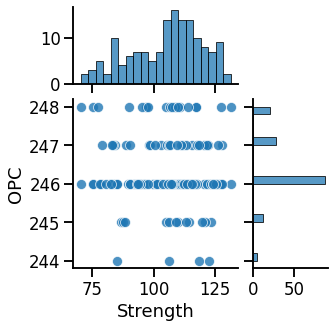

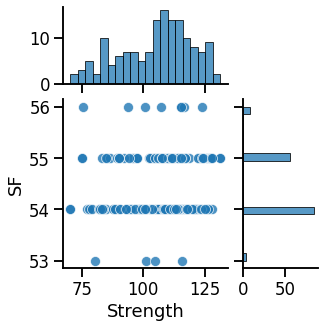

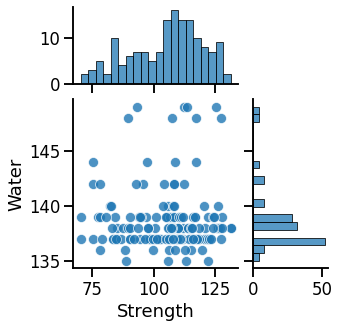

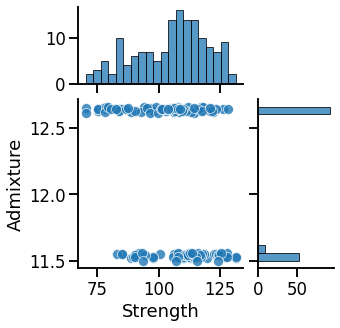

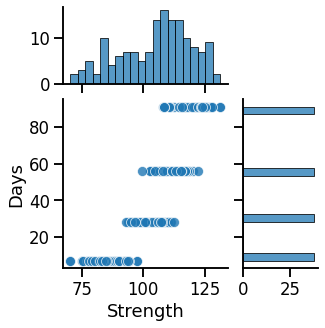

In [ ]:
x = "Strength"
sns.set_context("talk")
sns.jointplot(data = df, y="Fine", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=False, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Coarse", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="GGBS", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="OPC", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="SF", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Water", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Admixture", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
sns.jointplot(data = df, y="Days", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)
#sns.jointplot(data = df, y="Fine MC", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=False, height = 5, ratio=2, s=100, alpha=0.8)
#sns.jointplot(data = df, y="Coarse MC", x=x, marginal_kws=dict(bins=20, fill=True),marginal_ticks=True, height = 5, ratio=2, s=100, alpha=0.8)

In [ ]:
round(df.corr( ),2)

Fine  Coarse  GGBS   OPC  ...  Fine MC  Coarse MC  Days  Strength
Fine       1.00    0.06  0.00 -0.03  ...     0.64       0.03  0.00      0.13
Coarse     0.06    1.00 -0.07  0.16  ...     0.03      -0.05  0.00     -0.16
GGBS       0.00   -0.07  1.00  0.02  ...    -0.01       0.02  0.00     -0.07
OPC       -0.03    0.16  0.02  1.00  ...     0.13      -0.14  0.00     -0.05
SF         0.13   -0.23  0.13 -0.11  ...     0.45       0.22  0.00      0.13
Water      0.12    0.18 -0.17  0.27  ...     0.29       0.06  0.00      0.01
Admixture -0.57    0.24  0.14  0.16  ...    -0.62      -0.11  0.00     -0.27
Fine MC    0.64    0.03 -0.01  0.13  ...     1.00       0.31  0.00      0.16
Coarse MC  0.03   -0.05  0.02 -0.14  ...     0.31       1.00 -0.00     -0.04
Days       0.00    0.00  0.00  0.00  ...     0.00      -0.00  1.00      0.86
Strength   0.13   -0.16 -0.07 -0.05  ...     0.16      -0.04  0.86      1.00

[11 rows x 11 columns]

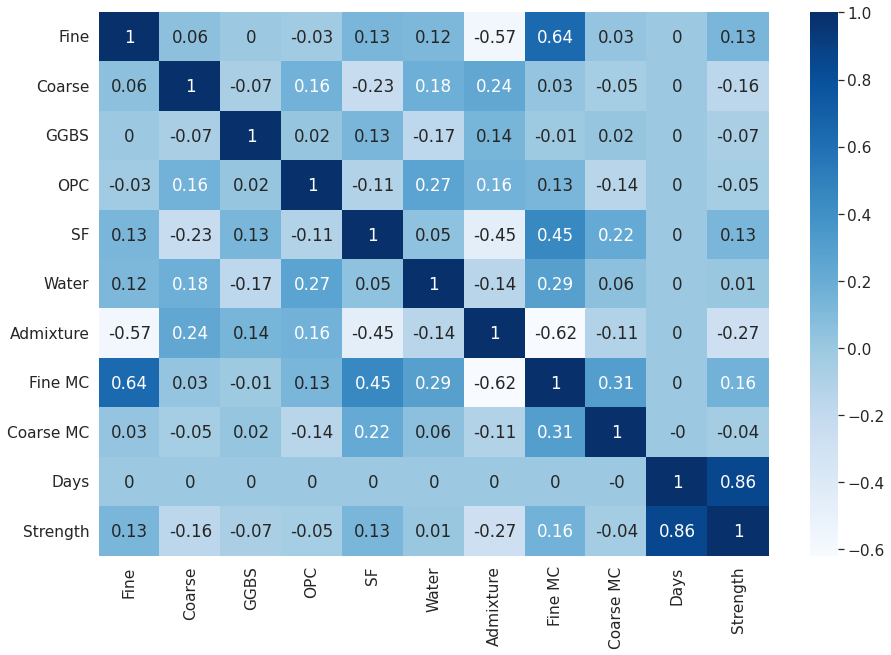

In [ ]:
df_corr = round(df.corr( ),2)
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(df_corr,annot=True,cmap=plt.cm.Blues)

In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
reg1 = setup(df, target = 'Strength', session_id=123, normalize = True, normalize_method = 'zscore', numeric_features = ['Fine','Coarse','GGBS','OPC','SF','Water','Admixture','Days'], use_gpu = True)

Description             Value
0                               session_id               123
1                                   Target          Strength
2                            Original Data         (152, 11)
3                           Missing Values             False
4                         Numeric Features                10
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set         (106, 10)
10                    Transformed Test Set          (46, 10)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU              True
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              cce3
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            zscore
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [ ]:
best_model = compare_models(fold = 10)

Model     MAE       MSE     RMSE      R2  \
lightgbm  Light Gradient Boosting Machine  3.5972   19.9448   4.3738  0.8583   
catboost               CatBoost Regressor  3.6119   21.8034   4.5927  0.8484   
gbr           Gradient Boosting Regressor  4.0171   22.3241   4.6720  0.8343   
ada                    AdaBoost Regressor  4.1960   26.5895   5.0514  0.8135   
xgboost         Extreme Gradient Boosting  3.9467   26.8653   5.0207  0.8080   
et                  Extra Trees Regressor  4.1713   25.4122   4.9969  0.8009   
rf                Random Forest Regressor  4.1911   26.4065   5.0755  0.7988   
lasso                    Lasso Regression  5.2806   44.0473   6.4899  0.7138   
br                         Bayesian Ridge  5.2179   42.0512   6.4088  0.6955   
ridge                    Ridge Regression  5.2135   42.0477   6.4129  0.6928   
lar                Least Angle Regression  5.2223   42.1630   6.4250  0.6897   
lr                      Linear Regression  5.2223   42.1630   6.4250  0.6897   
huber                     Huber Regressor  5.3025   43.1248   6.4936  0.6842   
dt                Decision Tree Regressor  5.5486   45.4278   6.6841  0.6559   
omp           Orthogonal Matching Pursuit  6.0525   56.4923   7.3230  0.6359   
en                            Elastic Net  6.5603   64.5206   7.7853  0.6218   
par          Passive Aggressive Regressor  5.9786   55.7276   7.3044  0.5331   
knn                 K Neighbors Regressor  8.0690   94.6940   9.5817  0.3605   
llar         Lasso Least Angle Regression  9.8418  153.5510  11.9104  0.1469   

           RMSLE    MAPE  TT (Sec)  
lightgbm  0.0425  0.0350     0.021  
catboost  0.0451  0.0354     0.427  
gbr       0.0450  0.0390     0.057  
ada       0.0487  0.0409     0.096  
xgboost   0.0470  0.0375     0.448  
et        0.0484  0.0405     0.764  
rf        0.0489  0.0408     0.798  
lasso     0.0651  0.0529     0.010  
br        0.0637  0.0518     0.010  
ridge     0.0636  0.0517     0.015  
lar       0.0636  0.0517     0.016  
lr        0.0636  0.0517     0.009  
huber     0.0641  0.0524     0.018  
dt        0.0657  0.0546     0.010  
omp       0.0720  0.0598     0.013  
en        0.0789  0.0665     0.010  
par       0.0720  0.0583     0.010  
knn       0.0961  0.0816     0.016  
llar      0.1179  0.0997     0.014

In [ ]:
b1 = create_model('lightgbm', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
0     3.13  15.94  3.99  0.90   0.03  0.03
1     3.01  13.54  3.68  0.86   0.04  0.03
2     4.64  36.38  6.03  0.91   0.06  0.05
3     3.69  19.54  4.42  0.71   0.04  0.03
4     3.18  18.23  4.27  0.81   0.04  0.03
5     3.47  14.07  3.75  0.94   0.04  0.03
6     4.39  26.02  5.10  0.90   0.05  0.05
7     4.09  27.06  5.20  0.69   0.05  0.04
8     2.08   6.19  2.49  0.97   0.02  0.02
9     3.07  11.77  3.43  0.93   0.03  0.03
Mean  3.47  18.87  4.24  0.86   0.04  0.03
SD    0.72   8.35  0.96  0.09   0.01  0.01

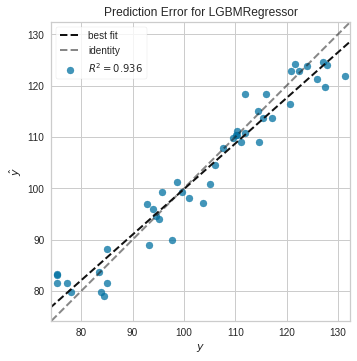

In [ ]:
plot_model(b1, plot = 'error')

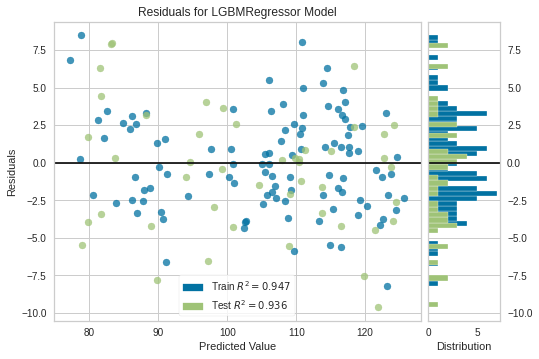

In [ ]:
plot_model(b1)

In [ ]:
b2 = create_model('catboost', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
0     3.37  18.10  4.25  0.89   0.04  0.03
1     3.45  15.04  3.88  0.84   0.04  0.03
2     4.85  45.13  6.72  0.89   0.07  0.05
3     4.64  25.09  5.01  0.63   0.05  0.04
4     3.27  18.23  4.27  0.81   0.04  0.03
5     3.51  18.60  4.31  0.93   0.04  0.03
6     3.35  26.20  5.12  0.90   0.06  0.04
7     3.02  19.08  4.37  0.78   0.04  0.03
8     2.75  12.00  3.46  0.94   0.04  0.03
9     3.90  20.57  4.54  0.88   0.04  0.04
Mean  3.61  21.80  4.59  0.85   0.05  0.04
SD    0.64   8.73  0.84  0.09   0.01  0.01

In [ ]:
b3 = create_model('gbr', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
0     4.60  26.42  5.14  0.84   0.05  0.04
1     3.28  13.54  3.68  0.86   0.04  0.03
2     4.12  24.84  4.98  0.94   0.05  0.04
3     4.42  24.42  4.94  0.64   0.04  0.04
4     3.87  20.52  4.53  0.79   0.04  0.04
5     5.06  33.99  5.83  0.87   0.06  0.05
6     3.64  18.20  4.27  0.93   0.05  0.04
7     4.29  31.62  5.62  0.64   0.05  0.04
8     3.10  11.98  3.46  0.94   0.03  0.03
9     3.80  19.15  4.38  0.88   0.04  0.03
Mean  4.02  22.47  4.68  0.83   0.05  0.04
SD    0.57   6.81  0.73  0.11   0.01  0.01

In [ ]:
b4 = create_model('ada', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
0     3.78  18.82  4.34  0.88   0.04  0.04
1     3.53  18.74  4.33  0.80   0.04  0.04
2     5.62  42.20  6.50  0.89   0.07  0.06
3     3.48  20.14  4.49  0.70   0.04  0.03
4     3.47  18.12  4.26  0.81   0.04  0.03
5     4.45  30.53  5.53  0.88   0.05  0.04
6     2.92  17.86  4.23  0.93   0.05  0.03
7     4.59  36.39  6.03  0.58   0.06  0.04
8     2.47  13.53  3.68  0.93   0.03  0.02
9     4.65  24.53  4.95  0.85   0.05  0.04
Mean  3.90  24.08  4.83  0.83   0.05  0.04
SD    0.88   8.82  0.86  0.10   0.01  0.01

In [ ]:
b5 = create_model('xgboost', fold = 10, round = 2)

MAE    MSE  RMSE    R2  RMSLE  MAPE
0     4.89  46.75  6.84  0.71   0.06  0.04
1     2.92  13.25  3.64  0.86   0.03  0.03
2     4.76  47.33  6.88  0.88   0.07  0.05
3     4.52  22.67  4.76  0.67   0.04  0.04
4     3.87  22.89  4.78  0.76   0.04  0.04
5     4.46  30.16  5.49  0.88   0.06  0.04
6     3.07  17.32  4.16  0.93   0.04  0.03
7     4.95  39.61  6.29  0.54   0.06  0.05
8     2.40   7.78  2.79  0.96   0.03  0.02
9     3.64  20.97  4.58  0.87   0.04  0.03
Mean  3.95  26.87  5.02  0.81   0.05  0.04
SD    0.86  13.03  1.29  0.13   0.01  0.01

In [ ]:
tuned_b1 = tune_model(b1, n_iter= 1000, optimize = 'RMSE',search_algorithm = 'random', search_library='scikit-learn')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     2.7614  11.1763  3.3431  0.9312  0.0299  0.0252
1     2.5959   9.0573  3.0095  0.9056  0.0288  0.0255
2     4.1408  26.2554  5.1240  0.9342  0.0557  0.0439
3     3.5733  16.5498  4.0681  0.7565  0.0365  0.0323
4     3.3419  20.3911  4.5156  0.7878  0.0434  0.0326
5     3.1933  14.4724  3.8043  0.9433  0.0363  0.0309
6     4.1451  21.8763  4.6772  0.9165  0.0508  0.0438
7     2.9895  18.2047  4.2667  0.7907  0.0397  0.0285
8     2.5485  10.5856  3.2536  0.9477  0.0297  0.0234
9     3.4379  13.6532  3.6950  0.9177  0.0343  0.0316
Mean  3.2727  16.2222  3.9757  0.8831  0.0385  0.0318
SD    0.5448   5.2181  0.6449  0.0701  0.0086  0.0068

In [ ]:
tuned_b2 = tune_model(b2, n_iter= 1000, optimize = 'RMSE',search_algorithm = 'random', search_library='scikit-learn')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     3.4658  17.5878  4.1938  0.8918  0.0378  0.0323
1     2.6720   9.7915  3.1291  0.8979  0.0300  0.0264
2     4.4081  25.2852  5.0284  0.9366  0.0534  0.0460
3     3.6570  17.5006  4.1834  0.7426  0.0377  0.0328
4     3.2659  17.2874  4.1578  0.8201  0.0383  0.0310
5     2.5617   9.7341  3.1200  0.9619  0.0290  0.0245
6     3.1018  15.0938  3.8851  0.9424  0.0430  0.0337
7     3.1967  18.7365  4.3286  0.7846  0.0392  0.0304
8     2.1558   6.7947  2.6067  0.9664  0.0238  0.0202
9     2.9956  10.6631  3.2654  0.9357  0.0310  0.0281
Mean  3.1480  14.8475  3.7898  0.8880  0.0363  0.0305
SD    0.5953   5.2792  0.6962  0.0747  0.0079  0.0065

In [ ]:
tuned_b3 = tune_model(b3, n_iter= 1000, optimize = 'RMSE',search_algorithm = 'random', search_library='scikit-learn')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     3.4887  20.1926  4.4936  0.8758  0.0396  0.0321
1     2.9019  12.1544  3.4863  0.8733  0.0336  0.0289
2     4.7800  25.8468  5.0840  0.9352  0.0525  0.0487
3     3.3084  17.2968  4.1589  0.7456  0.0377  0.0299
4     3.0538  14.0665  3.7505  0.8536  0.0356  0.0298
5     2.5793  10.7499  3.2787  0.9579  0.0310  0.0247
6     3.4951  16.5983  4.0741  0.9366  0.0455  0.0377
7     3.8515  27.7972  5.2723  0.6804  0.0495  0.0364
8     2.2738   6.7331  2.5948  0.9667  0.0238  0.0208
9     2.9716  10.0405  3.1687  0.9394  0.0308  0.0283
Mean  3.2704  16.1476  3.9362  0.8765  0.0380  0.0317
SD    0.6678   6.5040  0.8087  0.0905  0.0085  0.0074

In [ ]:
tuned_b4 = tune_model(b4, n_iter= 1000, optimize = 'RMSE',search_algorithm = 'random', search_library='scikit-learn')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     3.3720  19.5549  4.4221  0.8797  0.0416  0.0317
1     3.6136  18.6844  4.3225  0.8052  0.0416  0.0360
2     5.6368  43.0665  6.5625  0.8921  0.0678  0.0578
3     3.4227  18.2813  4.2757  0.7311  0.0392  0.0317
4     3.4169  18.5874  4.3113  0.8065  0.0401  0.0332
5     5.0564  35.0572  5.9209  0.8626  0.0568  0.0492
6     3.3431  18.8381  4.3403  0.9281  0.0462  0.0348
7     4.2953  31.4073  5.6042  0.6389  0.0525  0.0418
8     2.5309  12.2593  3.5013  0.9394  0.0318  0.0232
9     4.6335  23.9362  4.8925  0.8556  0.0457  0.0431
Mean  3.9321  23.9673  4.8153  0.8339  0.0463  0.0383
SD    0.8969   9.0286  0.8831  0.0877  0.0098  0.0095

In [ ]:
tuned_b5 = tune_model(b5, n_iter= 1000, optimize = 'RMSE',search_algorithm = 'random', search_library='scikit-learn')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     3.0928  16.5930  4.0734  0.8979  0.0359  0.0280
1     2.9218  10.9592  3.3105  0.8857  0.0318  0.0287
2     4.8127  30.9825  5.5662  0.9223  0.0580  0.0499
3     3.6056  17.5868  4.1937  0.7413  0.0377  0.0326
4     3.0044  15.0771  3.8829  0.8431  0.0363  0.0292
5     3.7797  18.0846  4.2526  0.9291  0.0399  0.0361
6     2.8486  14.0582  3.7494  0.9463  0.0413  0.0305
7     2.8617  16.8273  4.1021  0.8066  0.0385  0.0272
8     2.0391   6.0754  2.4648  0.9700  0.0238  0.0195
9     3.2558  12.8931  3.5907  0.9222  0.0335  0.0302
Mean  3.2222  15.9137  3.9186  0.8865  0.0377  0.0312
SD    0.6937   6.0867  0.7470  0.0666  0.0083  0.0074

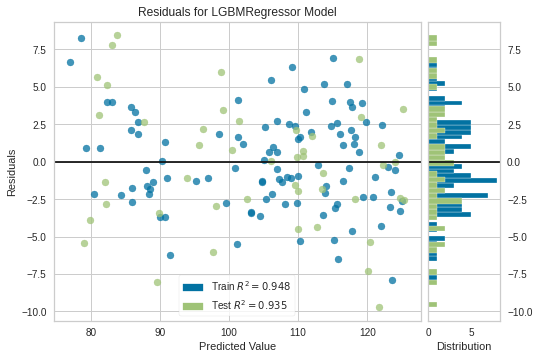

In [ ]:
plot_model(b1)

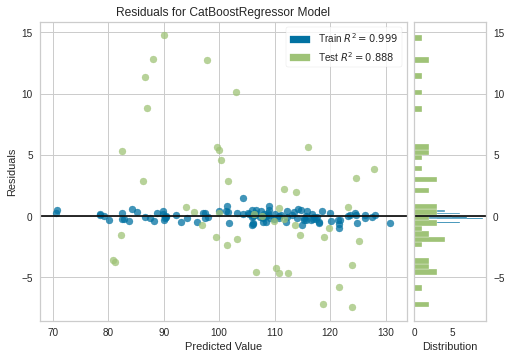

In [ ]:
plot_model(b2)

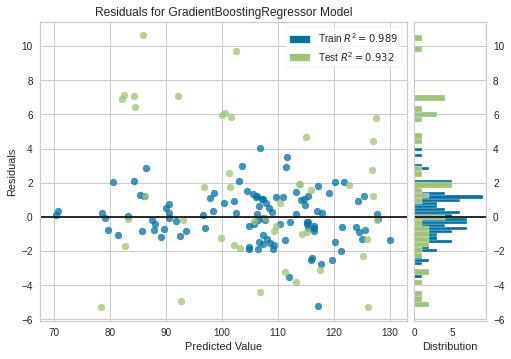

In [ ]:
plot_model(b3)

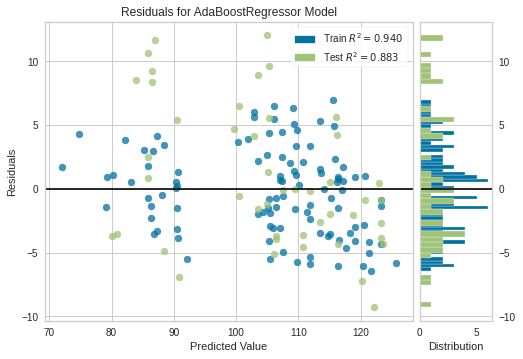

In [ ]:
plot_model(b4)

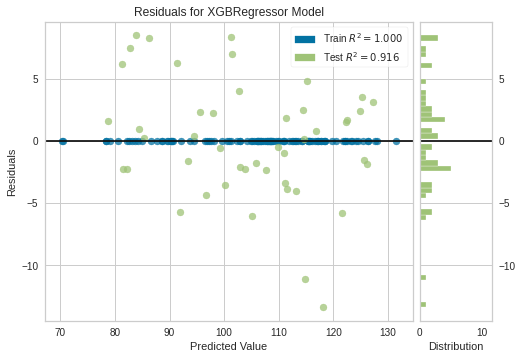

In [ ]:
plot_model(b5)

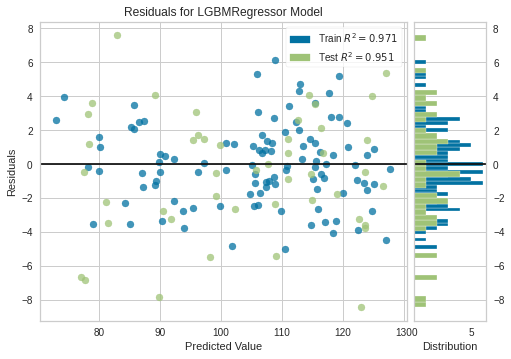

In [ ]:
plot_model(tuned_b1)

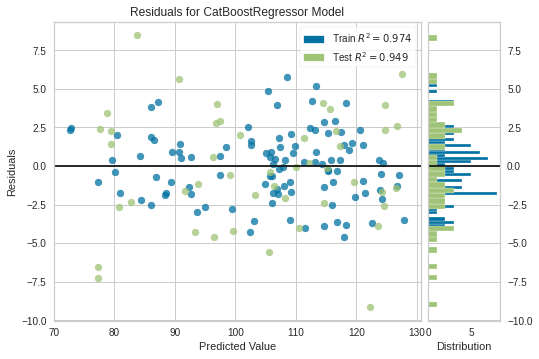

In [ ]:
plot_model(tuned_b2)

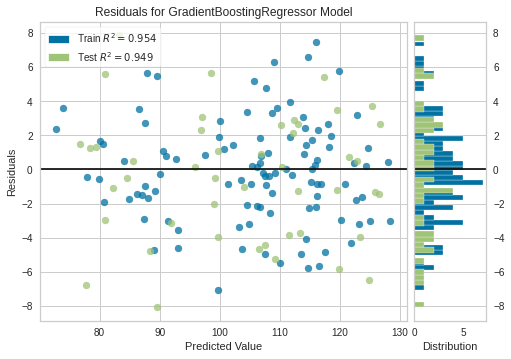

In [ ]:
plot_model(tuned_b3)

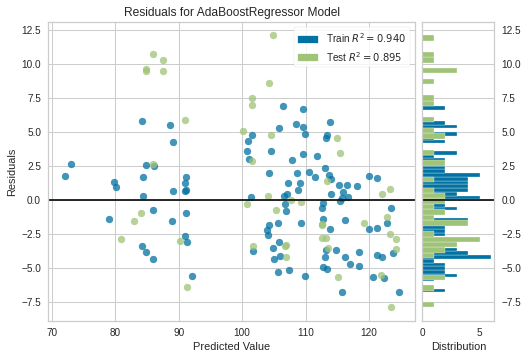

In [ ]:
plot_model(tuned_b4)

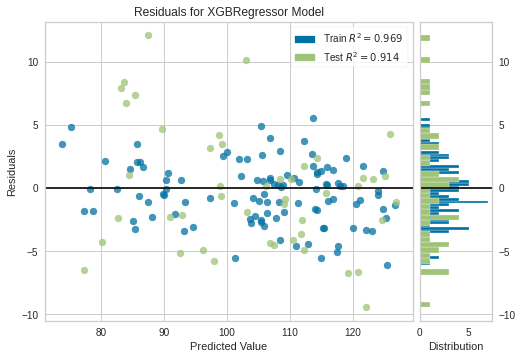

In [ ]:
plot_model(tuned_b5)

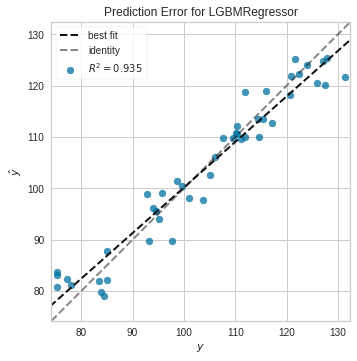

In [ ]:
plot_model(b1, plot = 'error')

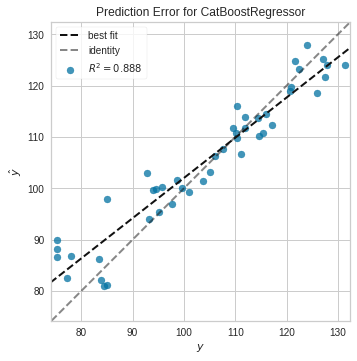

In [ ]:
plot_model(b2, plot = 'error')

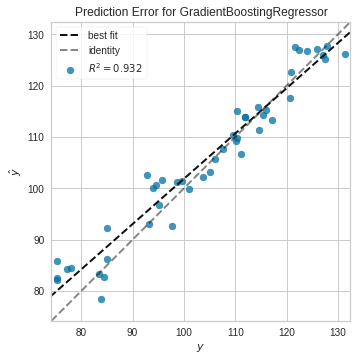

In [ ]:
plot_model(b3, plot = 'error')

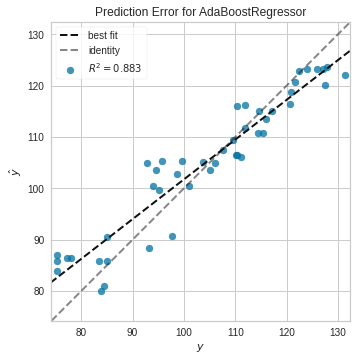

In [ ]:
plot_model(b4, plot = 'error')

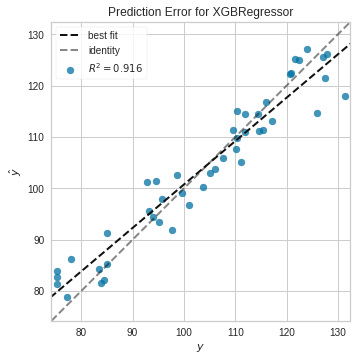

In [ ]:
plot_model(b5, plot = 'error')

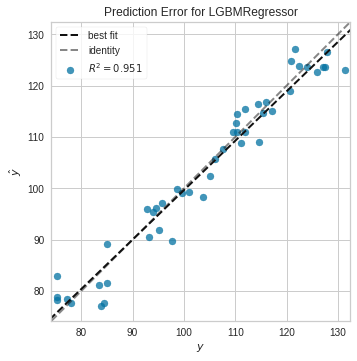

In [ ]:
plot_model(tuned_b1, plot = 'error')

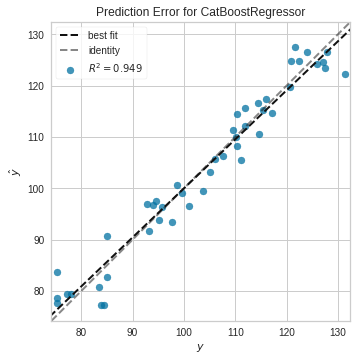

In [ ]:
plot_model(tuned_b2, plot = 'error')

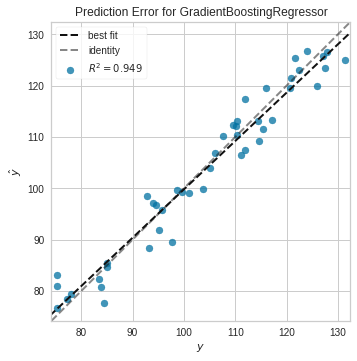

In [ ]:
plot_model(tuned_b3, plot = 'error')

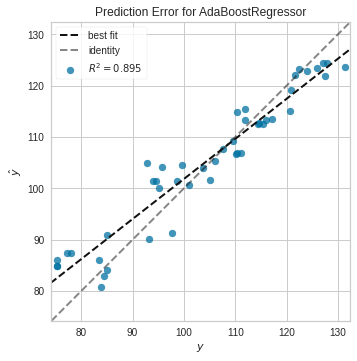

In [ ]:
plot_model(tuned_b4, plot = 'error')

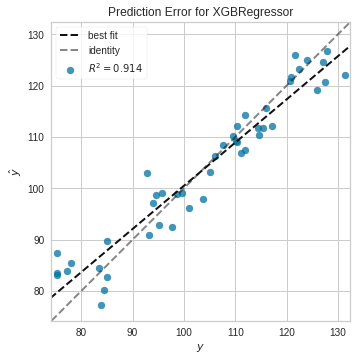

In [ ]:
plot_model(tuned_b5, plot = 'error')

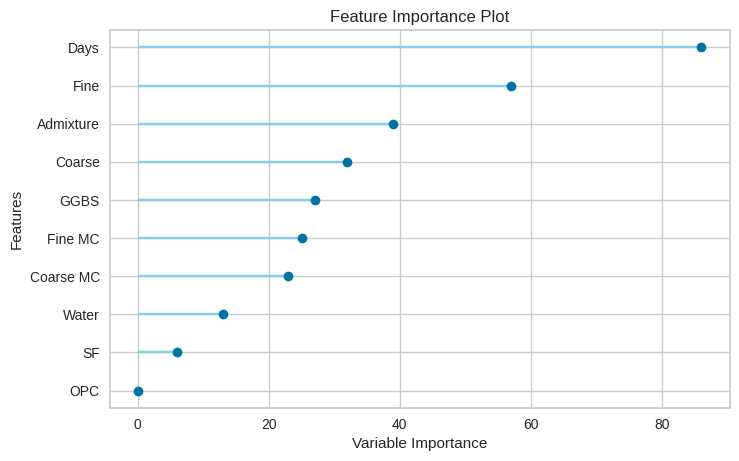

In [ ]:
plot_model(b1, plot='feature')

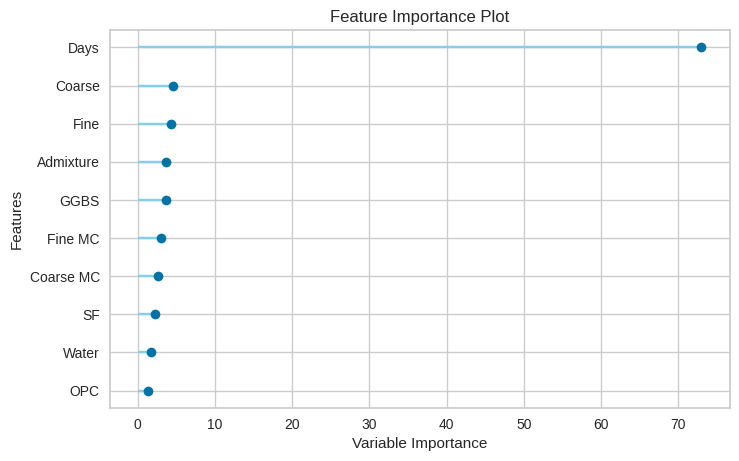

In [ ]:
plot_model(b2, plot='feature')

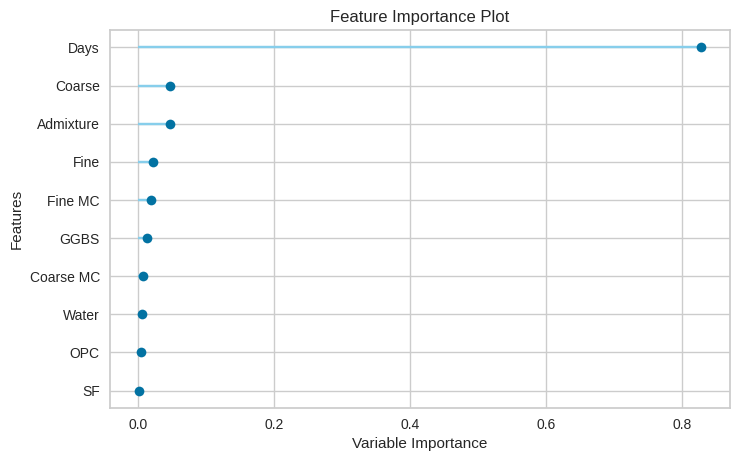

In [ ]:
plot_model(b3, plot='feature')

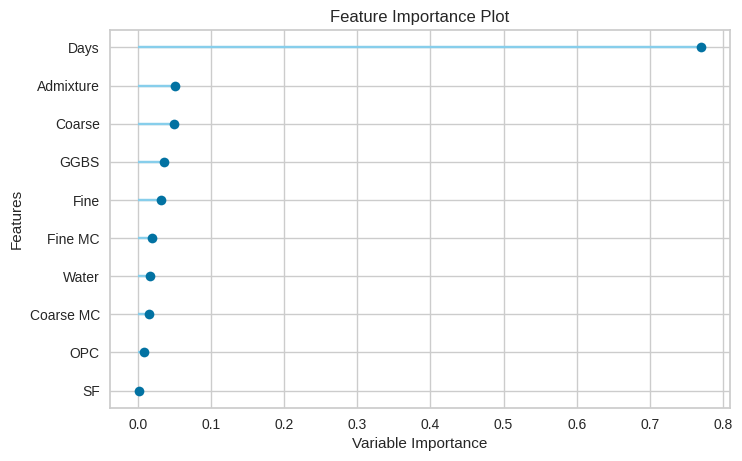

In [ ]:
plot_model(b4, plot='feature')

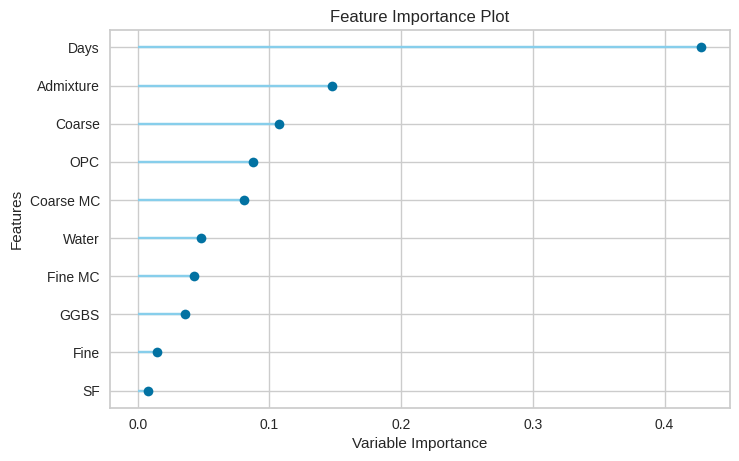

In [ ]:
plot_model(b5, plot='feature')